In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving mushrooms.csv to mushrooms.csv


{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

In [0]:
data = pd.read_csv('mushrooms.csv')


In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [5]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

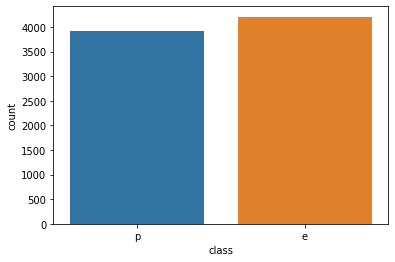

In [6]:
sns.countplot("class",data = data)

In [0]:
#data without odor for finding the dominance of featres
#data = data.drop(['odor'],axis=1)

In [17]:
#checking for missing values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [67]:
#presence of ?
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [68]:
#veil type has all values as 'p' we can either drop
data['veil-type'].unique()

array(['p'], dtype=object)

In [69]:
data['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [0]:
#data.drop(['veil-type'],axis=1)

In [0]:
#split data into x and y
X = data.iloc[:,data.columns!="class"]
y = data.iloc[:,data.columns=="class"]

In [8]:
X.shape

(8124, 22)

In [0]:
#label encode X and y, X not necssary as one hot encoding is to be applied
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
 
#for col in X.columns:
 #   X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [12]:
# 1 for poisonous and 0 for edible
y

array([1, 0, 0, ..., 0, 1, 0])

In [0]:
#one hot encoding on the X
X = pd.get_dummies(X,columns=X.columns, drop_first=True)


In [136]:
X.head(5)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,...,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [16]:
X.shape

(8124, 95)

In [0]:
#train test split
#try different test size split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42 )

In [19]:
X_train.shape

(5686, 95)

In [20]:
X_test.shape

(2438, 95)

In [0]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:

#pca check selecting number of components
from sklearn.decomposition import PCA
pca = PCA(n_components=15)#add number of components 

X_trainp = pca.fit_transform(X_train)
X_testp = pca.transform(X_test)



In [106]:
#pca finding number.. check for correctness
#covariance = pca.get_covariance()
#explained_variance = pca.explained_variance_
#explained_variance

array([8.94388597e+00, 6.82953950e+00, 5.70739604e+00, 5.49274431e+00,
       4.80434687e+00, 4.41523828e+00, 3.37792988e+00, 3.21032494e+00,
       2.38229887e+00, 2.16451327e+00, 2.07344476e+00, 1.97057723e+00,
       1.88117395e+00, 1.53461673e+00, 1.51139758e+00, 1.39038512e+00,
       1.37379512e+00, 1.30664870e+00, 1.29672500e+00, 1.20776426e+00,
       1.18608083e+00, 1.14379015e+00, 1.11746716e+00, 1.11691210e+00,
       1.08041735e+00, 1.06994030e+00, 1.02648290e+00, 1.00989747e+00,
       1.00243763e+00, 9.99824489e-01, 9.47719154e-01, 9.31864958e-01,
       8.92848449e-01, 8.69652996e-01, 8.57215401e-01, 8.40838615e-01,
       8.22698651e-01, 8.09508706e-01, 7.84120995e-01, 7.49032562e-01,
       7.14104181e-01, 6.89369102e-01, 6.66936278e-01, 6.27725394e-01,
       6.16774378e-01, 6.13434792e-01, 5.92579624e-01, 5.57594176e-01,
       5.39402009e-01, 5.28700002e-01, 5.24457902e-01, 5.08421891e-01,
       4.84322023e-01, 4.72156169e-01, 4.59404773e-01, 4.45861356e-01,
      

**MODELS**

In [0]:
#tunig pending

# **logistic regression**

In [96]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
y_predlr =lreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [260]:
#save model
#logmushroom = 'finalized_model.sav'
#dump(lreg, open(logmushroom, 'wb'))

# some time later...

# load the model from disk
#loaded_model = load(open(logmushroom, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

0.7179645145391819


In [99]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print("****************LOGISTIC REGRESSION*****************")
print("confusion matrix")
print(confusion_matrix(y_test,y_predlr))
print("accuracy:",accuracy_score(y_test,y_predlr))
print(classification_report(y_test,y_predlr))


****************LOGISTIC REGRESSION*****************
confusion matrix
[[1257    0]
 [   0 1181]]
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [0]:
#adjusting the threshold using predict proba set threshold as 0.25 as we cannot take risk
#Reduced the threshold to 0.02, even then the classifications performance were equal to the best model performance. 
y_prob = lreg.predict_proba(X_test)[:,1]
y_new_pred =[]
threshold1 = 0.02
for i in range(0,len(y_prob)):
  if y_prob[i]>threshold1:
    y_new_pred.append(1)
  else:
    y_new_pred.append(0)

In [113]:
#number of poisonuos mushrooms for threshold for prob as 0.25
y_new_pred.count(1)

1187

In [114]:
#edible count
y_new_pred.count(0)

1251

In [55]:
#ROC CURVE
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,y_prob)
auc = roc_auc_score(y_test,y_prob)
print(auc)

1.0


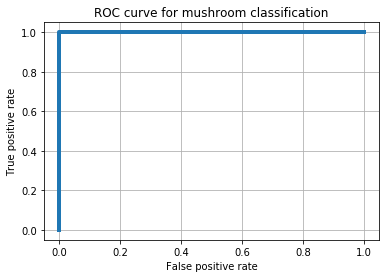

In [40]:
#plot ROC
plt.plot(fpr,tpr,linewidth = 4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for mushroom classification")
plt.grid()

In [94]:
#logistic regression with PCA number of components 15
lreg = LogisticRegression()
lreg.fit(X_trainp,y_train)
y_predlrp =lreg.predict(X_testp)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
print("************LOGISTIC REGRESSION- PCA ****************")
print("confusion matrix")
print(confusion_matrix(y_test,y_predlrp))
print("Accuracy:",accuracy_score(y_test,y_predlrp))
print(classification_report(y_test,y_predlrp))

************LOGISTIC REGRESSION- PCA ****************
confusion matrix
[[1233   24]
 [  16 1165]]
Accuracy: 0.9835931091058244
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1257
           1       0.98      0.99      0.98      1181

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



# **SVM**

In [0]:
from sklearn.svm import SVC
sm = SVC()
sm.fit(X_train,y_train)
y_predsvm = sm.predict(X_test)


In [121]:
print("********************** SVM  ************************")
print("confusion matrix")
print(confusion_matrix(y_test,y_predsvm))
print("accuracy:",accuracy_score(y_test,y_predsvm))
print(classification_report(y_test,y_predsvm))

********************** SVM  ************************
confusion matrix
[[1257    0]
 [   0 1181]]
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Decision **Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_preddt = dt.predict(X_test)

In [122]:
print("**************** DECISION TREE  ******************")
print("confusion matrix")
print(confusion_matrix(y_test,y_preddt))
print("accuracy:",accuracy_score(y_test,y_preddt))
print(classification_report(y_test,y_preddt))

**************** DECISION TREE  ******************
confusion matrix
[[1257    0]
 [   0 1181]]
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [0]:
feature_importancesdt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(kind="quicksort", ascending=False).reset_index()
#print(feature_importancesdt)

In [129]:
print("feature imporatance: Decision Tree")
print(feature_importancesdt[0:10])

feature imporatance: Decision Tree
                        index         0
0                      odor_n  0.630137
1                stalk-root_c  0.174635
2  stalk-surface-below-ring_y  0.093039
3         spore-print-color_r  0.032963
4         spore-print-color_u  0.020429
5    stalk-color-below-ring_c  0.018879
6                      odor_l  0.009692
7               stalk-shape_t  0.009125
8               ring-number_o  0.005506
9              gill-spacing_w  0.002079


In [0]:
#applying threshold
y_probdt = dt.predict_proba(X_test)[:,1]
y_new_preddt =[]
threshold1 = 0.3
for i in range(0,len(y_probdt)):
  if y_probdt[i]>threshold1:
    y_new_preddt.append(1)
  else:
    y_new_preddt.append(0)

In [50]:
y_new_preddt.count(1)

1181

In [51]:
y_new_pred.count(0)

1257

In [54]:
#ROC CURVE
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,y_probdt)
auc = roc_auc_score(y_test,y_probdt)
print(auc)

1.0


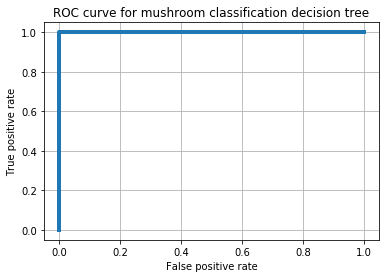

In [130]:
#plot ROC
plt.plot(fpr,tpr,linewidth = 4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for mushroom classification decision tree")
plt.grid()

# **Randomforest**

In [163]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
y_predrc = rc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [133]:
print("*****************  RANDOM FOREST  *******************")
print("confusion matrix")
print(confusion_matrix(y_test,y_predrc))
print("accuracy:",accuracy_score(y_test,y_predrc))
print(classification_report(y_test,y_predrc))

*****************  RANDOM FOREST  *******************
confusion matrix
[[1257    0]
 [   0 1181]]
accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [0]:
feature_importances = pd.Series(rc.feature_importances_, index=X.columns).sort_values(kind="quicksort", ascending=False).reset_index()
#print(feature_importances)

In [134]:
print("feature importance RANDOM FOREST")
print(feature_importances[0:10])

feature importance RANDOM FOREST
                        index         0
0                      odor_n  0.221040
1                 gill-size_n  0.072008
2                      odor_f  0.068213
3  stalk-surface-below-ring_k  0.055220
4                population_v  0.050009
5  stalk-surface-above-ring_s  0.048150
6                   bruises_t  0.046538
7  stalk-surface-below-ring_s  0.041386
8         spore-print-color_h  0.040553
9  stalk-surface-above-ring_k  0.034154


In [0]:
#applying threshold
y_probrc = rc.predict_proba(X_test)[:,1]
y_new_predrc =[]
threshold1 = 0.3
for i in range(0,len(y_probrc)):
  if y_probrc[i]>threshold1:
    y_new_predrc.append(1)
  else:
    y_new_predrc.append(0)

In [62]:
y_new_predrc.count(1)

1181

In [63]:
y_new_predrc.count(0)

1257

In [64]:
#ROC CURVE
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,y_probrc)
auc = roc_auc_score(y_test,y_probrc)
print(auc)

1.0


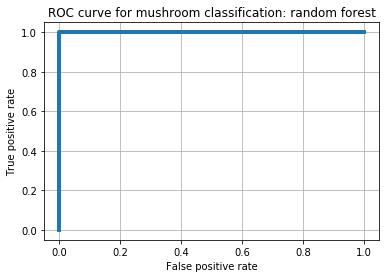

In [135]:
#plot ROC
plt.plot(fpr,tpr,linewidth = 4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for mushroom classification: random forest")
plt.grid()

# **GRADIENT BOOST**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_predgb = gb.predict(X_test)


In [83]:
print(classification_report(y_test,y_predgb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1257
           1       0.96      0.89      0.92      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



## SAVE THE MODEL

In [0]:
#logistic regression model
from pickle import dump
from pickle import load

In [198]:
logmushroom = 'finalized_model.sav'
dump(lreg, open(logmushroom, 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open(logmushroom, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [0]:
#logistic regression with two features odr and spore color

In [141]:
print(X.columns)

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [172]:
# logistic regression
features_2 =X[[ 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y']]
y2 = y
X2 = features_2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predlr2 = lr2.predict(X_test2)

In [174]:
print("*****************  lr 2 *******************")
print("confusion matrix")
print(confusion_matrix(y_test2,y_predlr2))
print("accuracy:",accuracy_score(y_test2,y_predlr2))
print(classification_report(y_test2,y_predlr2))

*****************  lr 2 *******************
confusion matrix
[[1236    0]
 [  39 1163]]
accuracy: 0.9840032813781788
              precision    recall  f1-score   support

           e       0.97      1.00      0.98      1236
           p       1.00      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [0]:
rc2 = RandomForestClassifier()


In [176]:
rc2.fit(X_train2,y_train2)
y_predrc2 = rc2.predict(X_test2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [177]:
print("*****************  rc 2 *******************")
print("confusion matrix")
print(confusion_matrix(y_test2,y_predrc2))
print("accuracy:",accuracy_score(y_test2,y_predrc2))
print(classification_report(y_test2,y_predrc2))

*****************  rc 2 *******************
confusion matrix
[[1236    0]
 [  39 1163]]
accuracy: 0.9840032813781788
              precision    recall  f1-score   support

           e       0.97      1.00      0.98      1236
           p       1.00      0.97      0.98      1202

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [0]:
#3 features
features_3 = X[['spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y','odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y']]

In [0]:
X3 = features_3
y3 = y
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)


In [180]:
rc3 = RandomForestClassifier()
rc3.fit(X_train3,y_train3)
y_predrc3 = rc3.predict(X_test3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [182]:
print("*****************random forest 3 feature *******************")
print("confusion matrix")
print(confusion_matrix(y_test3,y_predrc3))
print("accuracy:",accuracy_score(y_test3,y_predrc3))
print(classification_report(y_test3,y_predrc3))

*****************random forest 3 feature *******************
confusion matrix
[[1257    0]
 [  16 1165]]
accuracy: 0.9934372436423298
              precision    recall  f1-score   support

           e       0.99      1.00      0.99      1257
           p       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [0]:
features_4 = X[['spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y','odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y','habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w']]

In [0]:
X4 = features_4
y4 = y
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=42)


In [187]:
rc4 = RandomForestClassifier()
rc4.fit(X_train4,y_train4)
y_predrc4 = rc4.predict(X_test4)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [188]:
print("*****************random forest 4 feature *******************")
print("confusion matrix")
print(confusion_matrix(y_test4,y_predrc4))
print("accuracy:",accuracy_score(y_test4,y_predrc4))
print(classification_report(y_test4,y_predrc4))

*****************random forest 4 feature *******************
confusion matrix
[[1256    1]
 [   4 1177]]
accuracy: 0.9979491386382281
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

